<a href="https://colab.research.google.com/github/abdulkerimosman/datascience/blob/main/Unit_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import statsmodels.api as sm # Used to create the linear model

In [ ]:
from statsmodels.stats.outliers_influence \
      import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [ ]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
 

In [ ]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [ ]:
dir() # Shows the available functions to be used

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'drive',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'pd',
 'plt',
 'poly',
 'quit',
 'sm',
 'sns',
 'summarize']

In [ ]:
A = np.array([3,5,11])
dir(A) #Shows the available functions to be used with A

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

In [ ]:
A.argmin()

0

In [ ]:
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [ ]:
X = pd.DataFrame(
    {
        'intercept' : np.ones(Boston.shape[0]),
        'lstat' : Boston['lstat']
    }
)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [ ]:
y = Boston['medv']
model = sm.OLS(y,X)  # Creates a linear model
results = model.fit()

In [ ]:
summarize(results) # Shows t-statistic and p values

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [ ]:
 design = MS(['lstat']) # Creates the transform object, which would be used to create the model matrix with methods fit and transform
 design = design.fit(Boston) # Checks if lstat is available
 X_new = design.transform(Boston)  # Creates the model matrix, the matrix with intercept and predictors
 # X_new = design.fit_transform(Boston), is also possible
 X_new[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [ ]:
results.summary() # Extensive summary including F-static

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           5.08e-88
Time:                        08:16:52   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results.params # Returns fitted coefficients

,0
intercept,34.553841
lstat,-0.950049


In [ ]:
new_df = pd.DataFrame({'lstat' : [5,10,15]})
newX = design.transform(new_df) # The fit method was already done for lstat
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [ ]:
new_prediction = results.get_prediction(newX)
new_prediction.predicted_mean # We have to extract the predictions

array([29.80359411, 25.05334734, 20.30310057])

In [ ]:
new_prediction.conf_int(alpha=0.05) # alpha 0.05 means confidence interval is 95%

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [ ]:
new_prediction.conf_int(obs=True, alpha=0.05) # obs=True results in prediction interval


array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [ ]:
def abline(ax, b, m, *args, **kwargs): # This functions takes a pre-existing graph, takes its x-axis' limits, use that limit to get y's limit and draw a line.
    x_vals = np.array(ax.get_xlim())
    y_vals = m * x_vals + b
    ax.plot(x_vals, y_vals, *args, **kwargs) # args is argument w/o keyword, while kwargs is keyworded arguments

<ipython-input-22-0ffbdbf76ad8>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1],'r--',linewidth=3);


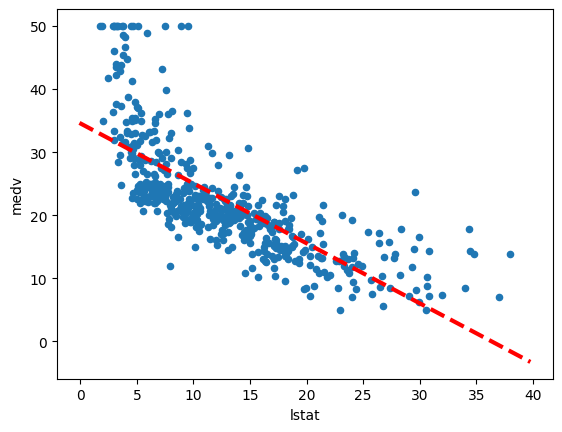

In [ ]:
ax = Boston.plot.scatter('lstat','medv');
abline(ax, results.params[0], results.params[1],'r--',linewidth=3);

The following code is to create a residual plot to check if the relationship is actually linear or not


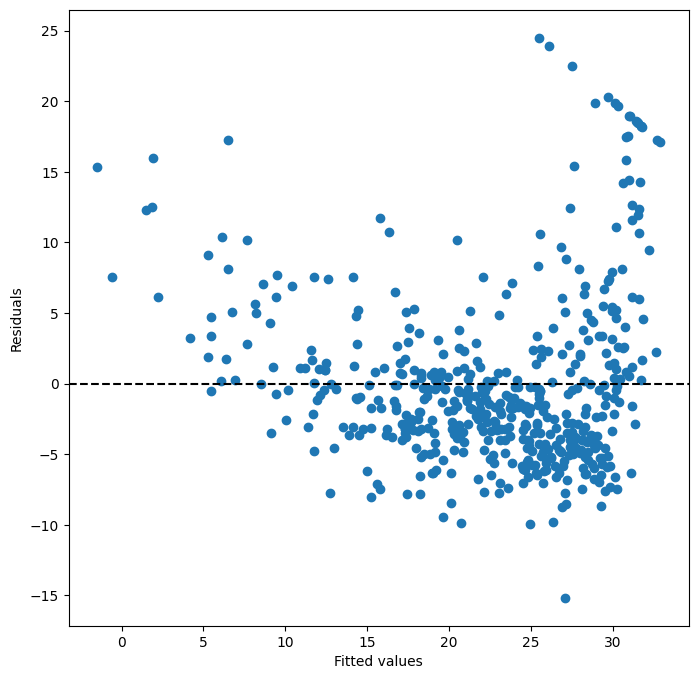

In [ ]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid) # fitted values are the models prediction of the response using the predictors it was trained on.
ax.set_xlabel('Fitted values')                  # residuals is the difference between the predicted and actual y
ax.set_ylabel('Residuals');
ax.axhline(0, c='k', ls='--')

In [ ]:
np.arange(X.shape[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

The following code is used to check if there are high leverage points in the dataset. High leverage points are independent value (X) points that are quite higher than the mean and that can affect our regression.

374

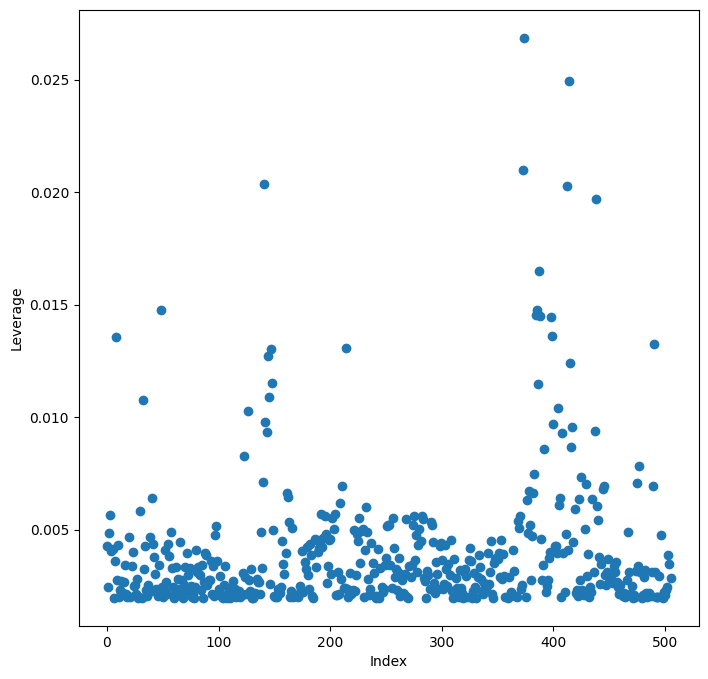

In [ ]:
infl = results.get_influence() # infl object contains diagnostic measures like leverage, etc...
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag) # infl.hat_matrix_diag gives us how far each point is from the mean, for independent values
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag) # this values has the highest leverage

In [ ]:
X = MS(['lstat','age']).fit_transform(Boston)
model1 = sm.OLS(y,X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [ ]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [ ]:
X = MS(terms).fit_transform(Boston)
model2 = sm.OLS(y,X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [ ]:
minus_age_indus = Boston.columns.drop(['age','indus','medv'])
minus_age_indus

Index(['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio',
       'lstat'],
      dtype='object')

In [ ]:
X = MS(minus_age_indus).fit_transform(Boston)
model3 = sm.OLS(y,X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,41.4517,4.903,8.454,0.000
crim,-0.1217,0.033,-3.696,0.000
zn,0.0462,0.014,3.378,0.001
chas,2.8719,0.863,3.329,0.001
nox,-18.2624,3.565,-5.122,0.000
rm,3.6730,0.409,8.978,0.000
dis,-1.5160,0.188,-8.078,0.000
rad,0.2839,0.064,4.440,0.000
tax,-0.0123,0.003,-3.608,0.000
ptratio,-0.9310,0.130,-7.138,0.000


To access the individual components of our model

In [ ]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

Checking how well the model is fit

In [ ]:
results3.rsquared # better result than results

0.7342422518382486

In [ ]:
scale = results3.scale # scale is RSS/n-p, so we should square root it to get RSE

In [ ]:
np.sqrt(scale)

4.7889153322237465

In [ ]:
vals = [VIF(X,i) #X stands for the values of the dataframe, while i stands for the column's indexes
        for i in range(1, X.shape[1])]
vif = pd.DataFrame(vals,
                   index=X.columns[1:])
vif


,0
crim,1.765478
zn,2.239107
chas,1.056997
nox,3.758338
rm,1.819577
dis,3.438955
rad,6.826385
tax,7.258419
ptratio,1.755565
lstat,2.527415


In [ ]:
# alternative way
vals = []
for i in range(1, X.values.shape[1]):
 vals.append(VIF(X.values, i))

In [ ]:
X = MS(['lstat','age',('lstat','age')]).fit_transform(Boston)
model4 = sm.OLS(y,X)
results4 = model4.fit()
summarize(results4)

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


Polynomial regression with orthogonal polynomials. These polynomials are uncorrelated resulting in stable computations


In [ ]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model5 = sm.OLS(y,X)
results5 = model5.fit()
summarize(results5)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


Raw polynomials might be collinear, unstable and harder to comprehend


In [ ]:
X = MS([poly('lstat', degree=2, raw=True), 'age']).fit_transform(Boston)
model6 = sm.OLS(y,X)
results6 = model6.fit()
summarize(results6)

,coef,std err,t,P>|t|
intercept,41.2885,0.873,47.284,0.0
"poly(lstat, degree=2, raw=True)[0]",-2.6883,0.131,-20.502,0.0
"poly(lstat, degree=2, raw=True)[1]",0.0495,0.004,13.315,0.0
age,0.0703,0.011,6.471,0.0


This is to perform a hypothesis test on whether the quadratic feature is necessary or not. Null test, not needed, Alternative test, there is a difference


In [ ]:
anova_lm(results1, results6)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


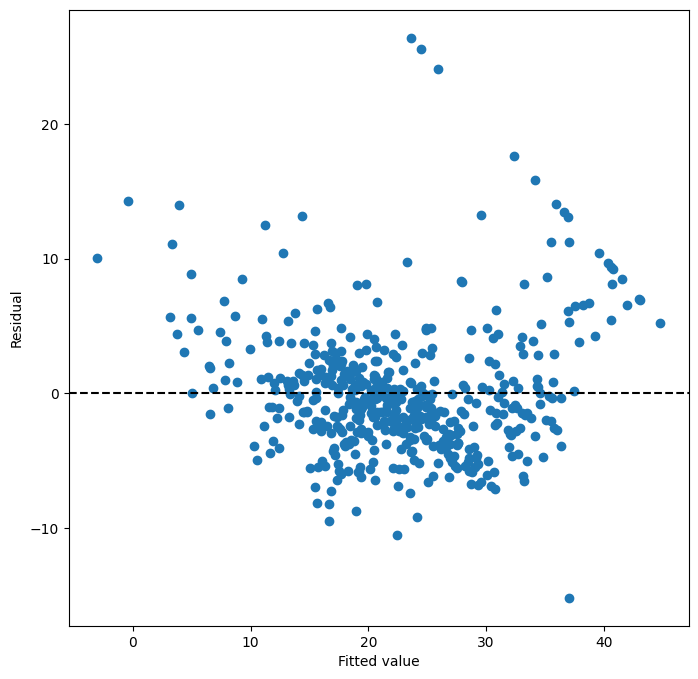

In [ ]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

Qualitative problems


In [ ]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288
